# Solving TSP

In [120]:
# List of capitals of Uruguay
capitals = [
    "Montevideo", "Canelones", "Maldonado", "Rocha", "Treinta y Tres",
    "Lavalleja", "Florida", "Durazno", "Cerro Largo", "Rivera",
    "Tacuarembó", "Salto", "Paysandú", "Río Negro", "Soriano",
    "Colonia", "San José", "Flores", "Artigas"
]

# Example distance matrix between capitals (symmetric, diagonal is zero)
distance_matrix = [
    # M   C   Ma  R   TT  L   F   D   CL  Ri  T   Sa  P   RN  So  Co  SJ  Fl  A
    [0,  50, 130, 200, 320, 120, 100, 180, 400, 500, 450, 480, 420, 400, 300, 180, 100, 200, 600], # Montevideo
    [50, 0,  110, 180, 300, 90,  80,  160, 380, 480, 430, 460, 400, 380, 280, 160, 80,  180, 580], # Canelones
    [130, 110, 0,  70,  190, 100, 190, 220, 340, 450, 400, 430, 370, 350, 250, 130, 110, 260, 560], # Maldonado
    [200, 180, 70,  0,  120, 170, 260, 290, 410, 520, 470, 500, 440, 420, 320, 200, 180, 330, 630], # Rocha
    [320, 300, 190, 120, 0,  290, 380, 410, 530, 640, 590, 620, 560, 540, 440, 320, 300, 450, 750], # Treinta y Tres
    [120, 90,  100, 170, 290, 0,  130, 160, 280, 390, 340, 370, 310, 290, 190, 120, 90,  240, 540], # Lavalleja
    [100, 80,  190, 260, 380, 130, 0,  100, 220, 330, 280, 310, 250, 230, 130, 100, 70,  200, 500], # Florida
    [180, 160, 220, 290, 410, 160, 100, 0,  320, 430, 380, 410, 350, 330, 230, 180, 150, 250, 550], # Durazno
    [400, 380, 340, 410, 530, 280, 220, 320, 0,  250, 200, 230, 170, 150, 50,  320, 300, 350, 380], # Cerro Largo
    [500, 480, 450, 520, 640, 390, 330, 430, 250, 0,  50,  80,  20,  50,  100, 480, 460, 510, 160], # Rivera
    [450, 430, 400, 470, 590, 340, 280, 380, 200, 50,  0,  30,  80,  60,  50,  430, 410, 460, 210], # Tacuarembó
    [480, 460, 430, 500, 620, 370, 310, 410, 230, 80,  30,  0,  110, 90,  100, 460, 440, 490, 240], # Salto
    [420, 400, 370, 440, 560, 310, 250, 350, 170, 20,  80,  110, 0,  40,  150, 400, 380, 430, 180], # Paysandú
    [400, 380, 350, 420, 540, 290, 230, 330, 150, 50,  60,  90,  40,  0,  140, 380, 360, 410, 200], # Río Negro
    [300, 280, 250, 320, 440, 190, 130, 230, 50,  100, 50,  100, 150, 140, 0,  280, 260, 310, 380], # Soriano
    [180, 160, 130, 200, 320, 120, 100, 180, 320, 480, 430, 460, 400, 380, 280, 0,  80,  130, 540], # Colonia
    [100, 80,  110, 180, 300, 90,  70,  150, 300, 460, 410, 440, 380, 360, 260, 80,  0,  150, 520], # San José
    [200, 180, 260, 330, 450, 240, 200, 250, 350, 510, 460, 490, 430, 410, 310, 130, 150, 0,  600], # Flores
    [600, 580, 560, 630, 750, 540, 500, 550, 380, 160, 210, 240, 180, 200, 380, 540, 520, 600, 0]  # Artigas
]

## Brute Force

In [117]:
import time
from tqdm import tqdm
import itertools

In [119]:
# Function to calculate the total distance of a given path
def calculate_distance(path, distance_matrix):
    total_distance = 0
    for i in range(len(path) - 1):
        total_distance += distance_matrix[path[i]][path[i + 1]]
    # Add the return to the starting point
    total_distance += distance_matrix[path[-1]][path[0]]
    return total_distance

# Brute-force TSP solver
def tsp_brute_force(capitals, distance_matrix):
    # Generate all possible permutations of city indices, excluding the first city
    city_indices = list(range(1, len(capitals)))
    all_possible_paths = itertools.permutations(city_indices)

    # Initialize the minimum distance and path
    min_distance = float('inf')
    best_path = None

    # Evaluate each path
    for path in all_possible_paths:
        # Add the starting city (index 0) at the beginning and end of the path
        current_path = [0] + list(path)
        current_distance = calculate_distance(current_path, distance_matrix)
        if current_distance < min_distance:
            min_distance = current_distance
            best_path = current_path

    return best_path, min_distance


In [87]:
times = []
numberOfCities = []
for i in tqdm(range(12)):
  numberOfCities.append(i+1)
  capitalsUntilIndex = capitals[:i+1]
  distanceUntilIndex = distance_matrix[:i+1]
  for j in range(i+1):
    distanceUntilIndex[j] = distanceUntilIndex[j][:i+1]
  print(capitalsUntilIndex)
  print(distanceUntilIndex)
  start = time.time();
  # Solve the TSP
  best_path, min_distance = tsp_brute_force(capitalsUntilIndex, distanceUntilIndex)
  print("Minimum Distance:", min_distance)
  end = time.time();
  times.append(end-start)


  0%|          | 0/12 [00:00<?, ?it/s]

['Montevideo']
[[0]]
Minimum Distance: 0
['Montevideo', 'Canelones']
[[0, 50], [50, 0]]
Minimum Distance: 100
['Montevideo', 'Canelones', 'Maldonado']
[[0, 50, 130], [50, 0, 110], [130, 110, 0]]
Minimum Distance: 290
['Montevideo', 'Canelones', 'Maldonado', 'Rocha']
[[0, 50, 130, 200], [50, 0, 110, 180], [130, 110, 0, 70], [200, 180, 70, 0]]
Minimum Distance: 430
['Montevideo', 'Canelones', 'Maldonado', 'Rocha', 'Treinta y Tres']
[[0, 50, 130, 200, 320], [50, 0, 110, 180, 300], [130, 110, 0, 70, 190], [200, 180, 70, 0, 120], [320, 300, 190, 120, 0]]
Minimum Distance: 670
['Montevideo', 'Canelones', 'Maldonado', 'Rocha', 'Treinta y Tres', 'Lavalleja']
[[0, 50, 130, 200, 320, 120], [50, 0, 110, 180, 300, 90], [130, 110, 0, 70, 190, 100], [200, 180, 70, 0, 120, 170], [320, 300, 190, 120, 0, 290], [120, 90, 100, 170, 290, 0]]
Minimum Distance: 750
['Montevideo', 'Canelones', 'Maldonado', 'Rocha', 'Treinta y Tres', 'Lavalleja', 'Florida']
[[0, 50, 130, 200, 320, 120, 100], [50, 0, 110, 180,

 75%|███████▌  | 9/12 [00:00<00:00, 38.66it/s]

Minimum Distance: 1420
['Montevideo', 'Canelones', 'Maldonado', 'Rocha', 'Treinta y Tres', 'Lavalleja', 'Florida', 'Durazno', 'Cerro Largo', 'Rivera']
[[0, 50, 130, 200, 320, 120, 100, 180, 400, 500], [50, 0, 110, 180, 300, 90, 80, 160, 380, 480], [130, 110, 0, 70, 190, 100, 190, 220, 340, 450], [200, 180, 70, 0, 120, 170, 260, 290, 410, 520], [320, 300, 190, 120, 0, 290, 380, 410, 530, 640], [120, 90, 100, 170, 290, 0, 130, 160, 280, 390], [100, 80, 190, 260, 380, 130, 0, 100, 220, 330], [180, 160, 220, 290, 410, 160, 100, 0, 320, 430], [400, 380, 340, 410, 530, 280, 220, 320, 0, 250], [500, 480, 450, 520, 640, 390, 330, 430, 250, 0]]
Minimum Distance: 1780
['Montevideo', 'Canelones', 'Maldonado', 'Rocha', 'Treinta y Tres', 'Lavalleja', 'Florida', 'Durazno', 'Cerro Largo', 'Rivera', 'Tacuarembó']
[[0, 50, 130, 200, 320, 120, 100, 180, 400, 500, 450], [50, 0, 110, 180, 300, 90, 80, 160, 380, 480, 430], [130, 110, 0, 70, 190, 100, 190, 220, 340, 450, 400], [200, 180, 70, 0, 120, 170, 26

100%|██████████| 12/12 [02:06<00:00, 10.54s/it]

Minimum Distance: 1840


In [118]:
times

[5.5789947509765625e-05,
 3.6716461181640625e-05,
 3.7670135498046875e-05,
 4.57763671875e-05,
 0.00012087821960449219,
 0.0003075599670410156,
 0.01536703109741211,
 0.026766300201416016,
 0.18743371963500977,
 1.300163745880127,
 9.94903826713562,
 114.95726990699768]

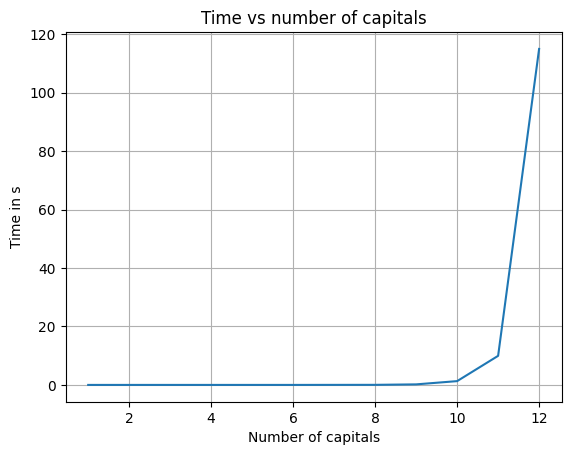

In [89]:
import matplotlib.pyplot as plt
plt.plot(numberOfCities,times)

# Add labels and title
plt.xlabel('Number of capitals')
plt.ylabel('Time in s')
plt.grid(True)
plt.title('Time vs number of capitals')

# Display the plot
plt.show()

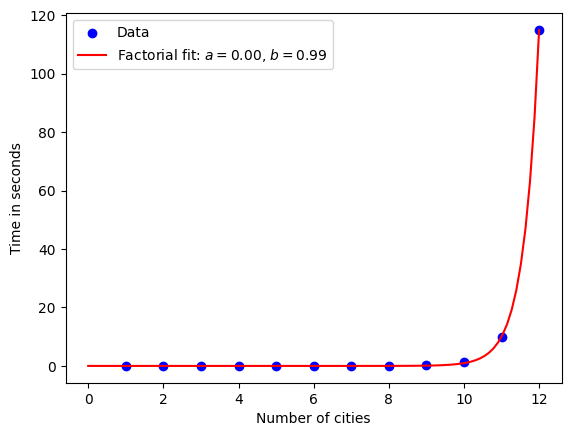

Fitted parameters: a = 0.000000356, b = 0.99


In [101]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import gamma
import matplotlib.pyplot as plt

# Define the model function using Gamma function
def factorial_model(x, a, b):
    return a * gamma(b * x + 1)

# Your data
x = np.array(numberOfCities)
y = np.array(times)

# Fit the curve
popt, pcov = curve_fit(factorial_model, x, y, p0=(1, 1))

# Get the fitted parameters
a, b = popt

# Generate values for plotting
x_fit = np.linspace(0, len(x), 100)
y_fit = factorial_model(x_fit, *popt)

# Plotting
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x_fit, y_fit, color='red', label=f'Factorial fit: $a={a:.2f}$, $b={b:.2f}$')
plt.xlabel('Number of cities')
plt.ylabel('Time in seconds')
plt.legend()
plt.show()

print(f"Fitted parameters: a = {a:.3f}, b = {b:.2f}")

In [102]:
result = factorial_model(19, a, b) / 3.15**7

print(f"For 19 cities: {result:_} years")


For 19 cities: 6_758_905.697801441 years


In [103]:
result = factorial_model(20, a, b) / 3.15**7

print(f"For 20 cities: {result:_} years")


For 20 cities: 128_389_630.80466476 years


## Backtracking

In [105]:
impostance

def tsp_backtrackinrt itertools

def calculate_distance(path, distance_matrix):
    total_distance = 0
    for i in range(len(path) - 1):
        total_distance += distance_matrix[path[i]][path[i + 1]]
    total_distance += distance_matrix[path[-1]][path[0]]  # Return to starting point
    return total_dig(capitals, distance_matrix):
    def backtrack(current_path, current_distance, visited):
        nonlocal min_distance, best_path

        # If the current path is complete, check the total distance
        if len(current_path) == len(capitals):
            total_distance = current_distance + distance_matrix[current_path[-1]][current_path[0]]
            if total_distance < min_distance:
                min_distance = total_distance
                best_path = current_path[:]
            return

        # Explore further paths
        for i in range(len(capitals)):
            if not visited[i]:
                # Mark this city as visited
                visited[i] = True
                # Add this city to the path
                current_path.append(i)
                # Recur with the updated path and distance
                backtrack(current_path, current_distance + distance_matrix[current_path[-2]][i], visited)
                # Backtrack
                visited[i] = False
                current_path.pop()

    # Initialize the starting state
    min_distance = float('inf')
    best_path = []
    visited = [False] * len(capitals)

    # Start from the first city (index 0)
    visited[0] = True
    backtrack([0], 0, visited)

    return best_path, min_distance



In [108]:
timesBT = []
numberOfCitiesBT = []
for i in tqdm(range(12)):
  numberOfCitiesBT.append(i+1)
  capitalsUntilIndexBT = capitals[:i+1]
  distanceUntilIndexBT = distance_matrix[:i+1]
  for j in range(i+1):
    distanceUntilIndexBT[j] = distanceUntilIndexBT[j][:i+1]
  print(capitalsUntilIndexBT)
  print(distanceUntilIndexBT)
  start = time.time();
  # Solve the TSP
  best_path, min_distance = tsp_backtracking(capitalsUntilIndexBT, distanceUntilIndexBT)
  print("Minimum Distance:", min_distance)
  end = time.time();
  timesBT.append(end-start)

 75%|███████▌  | 9/12 [00:00<00:00, 71.64it/s]

['Montevideo']
[[0]]
Minimum Distance: 0
['Montevideo', 'Canelones']
[[0, 50], [50, 0]]
Minimum Distance: 100
['Montevideo', 'Canelones', 'Maldonado']
[[0, 50, 130], [50, 0, 110], [130, 110, 0]]
Minimum Distance: 290
['Montevideo', 'Canelones', 'Maldonado', 'Rocha']
[[0, 50, 130, 200], [50, 0, 110, 180], [130, 110, 0, 70], [200, 180, 70, 0]]
Minimum Distance: 430
['Montevideo', 'Canelones', 'Maldonado', 'Rocha', 'Treinta y Tres']
[[0, 50, 130, 200, 320], [50, 0, 110, 180, 300], [130, 110, 0, 70, 190], [200, 180, 70, 0, 120], [320, 300, 190, 120, 0]]
Minimum Distance: 670
['Montevideo', 'Canelones', 'Maldonado', 'Rocha', 'Treinta y Tres', 'Lavalleja']
[[0, 50, 130, 200, 320, 120], [50, 0, 110, 180, 300, 90], [130, 110, 0, 70, 190, 100], [200, 180, 70, 0, 120, 170], [320, 300, 190, 120, 0, 290], [120, 90, 100, 170, 290, 0]]
Minimum Distance: 750
['Montevideo', 'Canelones', 'Maldonado', 'Rocha', 'Treinta y Tres', 'Lavalleja', 'Florida']
[[0, 50, 130, 200, 320, 120, 100], [50, 0, 110, 180,

 75%|███████▌  | 9/12 [00:13<00:00, 71.64it/s]

Minimum Distance: 1780
['Montevideo', 'Canelones', 'Maldonado', 'Rocha', 'Treinta y Tres', 'Lavalleja', 'Florida', 'Durazno', 'Cerro Largo', 'Rivera', 'Tacuarembó', 'Salto']
[[0, 50, 130, 200, 320, 120, 100, 180, 400, 500, 450, 480], [50, 0, 110, 180, 300, 90, 80, 160, 380, 480, 430, 460], [130, 110, 0, 70, 190, 100, 190, 220, 340, 450, 400, 430], [200, 180, 70, 0, 120, 170, 260, 290, 410, 520, 470, 500], [320, 300, 190, 120, 0, 290, 380, 410, 530, 640, 590, 620], [120, 90, 100, 170, 290, 0, 130, 160, 280, 390, 340, 370], [100, 80, 190, 260, 380, 130, 0, 100, 220, 330, 280, 310], [180, 160, 220, 290, 410, 160, 100, 0, 320, 430, 380, 410], [400, 380, 340, 410, 530, 280, 220, 320, 0, 250, 200, 230], [500, 480, 450, 520, 640, 390, 330, 430, 250, 0, 50, 80], [450, 430, 400, 470, 590, 340, 280, 380, 200, 50, 0, 30], [480, 460, 430, 500, 620, 370, 310, 410, 230, 80, 30, 0]]


100%|██████████| 12/12 [02:13<00:00, 11.14s/it]

Minimum Distance: 1840


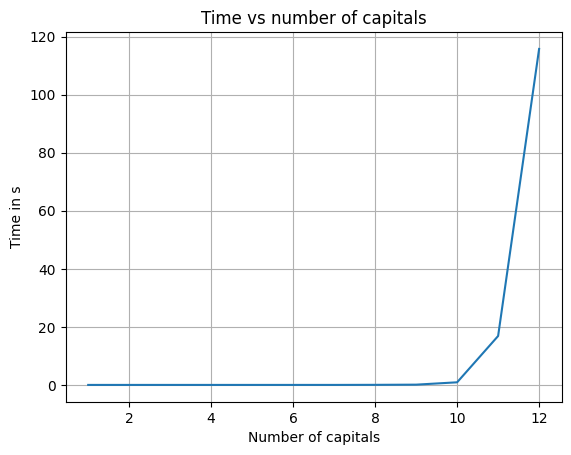

In [109]:
import matplotlib.pyplot as plt
plt.plot(numberOfCitiesBT,timesBT)

# Add labels and title
plt.xlabel('Number of capitals')
plt.ylabel('Time in s')
plt.grid(True)
plt.title('Time vs number of capitals')

# Display the plot
plt.show()

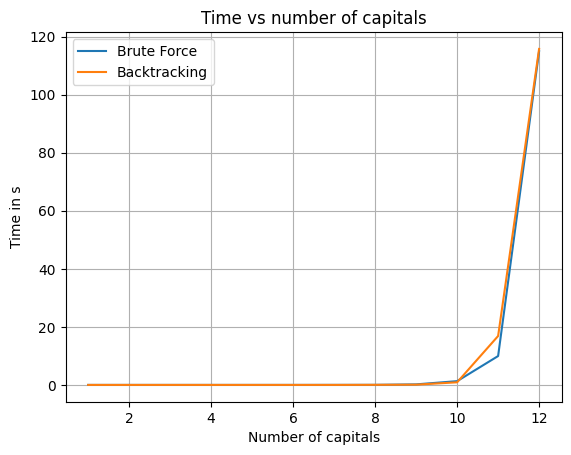

In [110]:
plt.plot(numberOfCities,times,label='Brute Force')
plt.plot(numberOfCitiesBT,timesBT,label='Backtracking')
plt.xlabel('Number of capitals')
plt.ylabel('Time in s')
plt.grid(True)
plt.title('Time vs number of capitals')
plt.legend()
plt.show()

## Greedy (Nearest neighbour heuristic)

In [114]:
def tsp_greedy(capitals, distance_matrix):
    num_capitals = len(capitals)
    visited = [False] * num_capitals
    path = []
    total_distance = 0

    # Start from the first city (index 0)
    current_city = 0
    path.append(current_city)
    visited[current_city] = True

    for _ in range(num_capitals-1):
        nearest_city = None
        min_distance = float('inf')

        for city in range(num_capitals):
            if not visited[city] and distance_matrix[current_city][city] < min_distance:
                min_distance = distance_matrix[current_city][city]
                nearest_city = city

        # Move to the nearest city
        path.append(nearest_city)
        total_distance += min_distance
        visited[nearest_city] = True
        current_city = nearest_city

    # Add the return to the starting city
    total_distance += distance_matrix[current_city][path[0]]
    path.append(path[0])

    return path, total_distance

In [121]:
start = time.time()
path, distance = tsp_greedy(capitals, distance_matrix)
end = time.time()
print("Time:", end-start,'s')
print("Path:", [capitals[i] for i in path])
print("Total Distance (not optimal):", distance)

Time: 0.00020885467529296875 s
Path: ['Montevideo', 'Canelones', 'Florida', 'San José', 'Colonia', 'Lavalleja', 'Maldonado', 'Rocha', 'Treinta y Tres', 'Durazno', 'Soriano', 'Cerro Largo', 'Río Negro', 'Paysandú', 'Rivera', 'Tacuarembó', 'Salto', 'Artigas', 'Flores', 'Montevideo']
Total Distance (not optimal): 2710


In [127]:
timesGr = []
numberOfCitiesGr = []
for i in tqdm(range(18)):
  numberOfCitiesGr.append(i+1)
  capitalsUntilIndexGr = capitals[:i+1]
  distanceUntilIndexGr = distance_matrix[:i+1]
  for j in range(i+1):
    distanceUntilIndexGr[j] = distanceUntilIndexGr[j][:i+1]
  print(capitalsUntilIndexGr)
  print(distanceUntilIndexGr)
  start = time.time();
  # Solve the TSP
  best_path, min_distance = tsp_greedy(capitalsUntilIndexGr, distanceUntilIndexGr)
  print("Minimum Distance:", min_distance)
  end = time.time();
  timesGr.append(end-start)


100%|██████████| 18/18 [00:00<00:00, 2692.88it/s]

['Montevideo']
[[0]]
Minimum Distance: 0
['Montevideo', 'Canelones']
[[0, 50], [50, 0]]
Minimum Distance: 100
['Montevideo', 'Canelones', 'Maldonado']
[[0, 50, 130], [50, 0, 110], [130, 110, 0]]
Minimum Distance: 290
['Montevideo', 'Canelones', 'Maldonado', 'Rocha']
[[0, 50, 130, 200], [50, 0, 110, 180], [130, 110, 0, 70], [200, 180, 70, 0]]
Minimum Distance: 430
['Montevideo', 'Canelones', 'Maldonado', 'Rocha', 'Treinta y Tres']
[[0, 50, 130, 200, 320], [50, 0, 110, 180, 300], [130, 110, 0, 70, 190], [200, 180, 70, 0, 120], [320, 300, 190, 120, 0]]
Minimum Distance: 670
['Montevideo', 'Canelones', 'Maldonado', 'Rocha', 'Treinta y Tres', 'Lavalleja']
[[0, 50, 130, 200, 320, 120], [50, 0, 110, 180, 300, 90], [130, 110, 0, 70, 190, 100], [200, 180, 70, 0, 120, 170], [320, 300, 190, 120, 0, 290], [120, 90, 100, 170, 290, 0]]
Minimum Distance: 750
['Montevideo', 'Canelones', 'Maldonado', 'Rocha', 'Treinta y Tres', 'Lavalleja', 'Florida']
[[0, 50, 130, 200, 320, 120, 100], [50, 0, 110, 180,

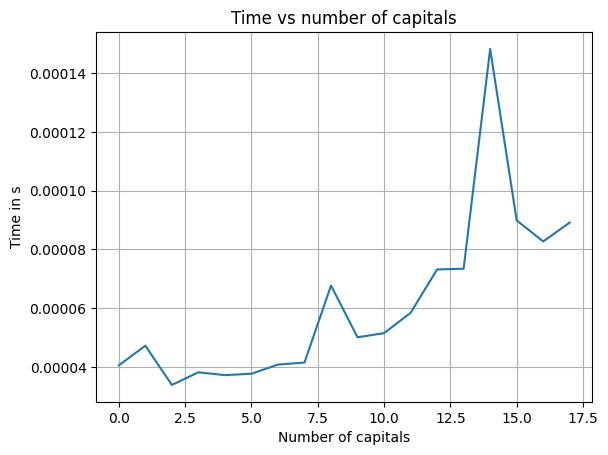

In [129]:
plt.plot(timesGr)
plt.xlabel('Number of capitals')
plt.ylabel('Time in s')
plt.grid(True)
plt.title('Time vs number of capitals')
plt.show()

Nearest Neighbor Heuristic:

* Description: Greedily constructs a tour by repeatedly visiting the nearest unvisited city.
* Complexity: O(n^2), which is relatively fast but does not guarantee optimal solutions.

## Other methods:

ChatGPT answer:

Solving the Traveling Salesperson Problem (TSP) with high inputs is challenging due to its combinatorial nature. Exact algorithms become computationally infeasible for large datasets, so heuristic and approximation methods are commonly used to find good solutions within reasonable time. Here are some approaches to handle TSP with high inputs:

1. Approximation Algorithms: Christofides' Algorithm

  Description: Provides a solution that is at most 3/2 times the optimal solution for metric TSP (where distances satisfy the triangle inequality).
Complexity: O(n^3), which is efficient for large instances.
Implementation: Uses Minimum Spanning Tree (MST), Minimum Weight Perfect Matching, and Eulerian Circuit.
Nearest Neighbor Heuristic
Description: Greedily constructs a tour by repeatedly visiting the nearest unvisited city.
Complexity: O(n^2), which is relatively fast but does not guarantee optimal solutions.
2. Metaheuristic Algorithms: Genetic Algorithms

  Description: Use evolutionary techniques such as selection, crossover, and mutation to evolve a population of solutions.
Complexity: Depends on the number of generations and population size but generally handles large inputs well.
Implementation: Requires defining a fitness function, mutation rate, and crossover strategy.
Simulated Annealing
Description: Mimics the annealing process in metallurgy, allowing occasional worse solutions to escape local minima.
Complexity: Variable, generally polynomial in practice.
Implementation: Requires cooling schedule and probability function.
Ant Colony Optimization
Description: Inspired by the behavior of ants finding paths to food sources, uses pheromone trails to guide search.
Complexity: Depends on the number of ants and iterations.
Implementation: Requires parameters for pheromone evaporation, exploration, and exploitation.
3. Dynamic Programming: Held-Karp Algorithm

  Description: Solves TSP using dynamic programming to keep track of subproblems.
Complexity: O(n^2 * 2^n), which is exponential but feasible for moderately large n (typically up to 20-30).
Implementation: Uses bit masking to represent subsets of cities.
4. Branch and Bound

  Description: Systematically explores branches of the solution space, pruning branches that cannot improve upon the best known solution.
  Complexity: Can be very efficient for some instances but is still exponential in the worst case.
Implementation: Requires bounding functions and pruning strategies.

5. Local Search Methods: 2-Opt and 3-Opt

  Description: Iteratively improves a tour by reversing segments of the path to reduce the total distance.
  Complexity: O(n^2) for 2-Opt, O(n^3) for 3-Opt.
  Implementation: Simple to implement and can be effective when combined with other methods